## In this Notebook the basic results of "An Artificial Neuron Implemented on an Actual Quantum Processor", arXiv: 1811.0226v1 are reproduced.

Author: Gerhard Hellstern, ghellstern@gmx.de

In [2]:
from qiskit import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# See a list of available local simulators
print("Aer backends: ", Aer.backends())

Aer backends:  [<QasmSimulator('qasm_simulator') from AerProvider()>, <StatevectorSimulator('statevector_simulator') from AerProvider()>, <UnitarySimulator('unitary_simulator') from AerProvider()>]


## Case Q=4 

In [33]:
### N=4
## 3.9.2019
## 
## This code reproduces the results of the above paper ...
## Uses mcrx an mcrz as in the latest Qiskit version

n=np.zeros(16)
m=np.zeros(16)

i=np.ones(16)
w=np.ones(16)

ii=np.ones(16)
ww=np.ones(16)



m[6]=1
m[9]=1
m[10]=1
m[11]=1
m[14]=1

w=(-w)**m

As workes out in the paper, with Q=4, a 4x4 checker board can be constructed. As an input to the algorithm, it has to be decided, which of them are on (=1) or off (=0):

In [34]:
n[6]=1
n[9]=1
n[10]=1
n[11]=1
#n[14]=1

i=(-i)**n

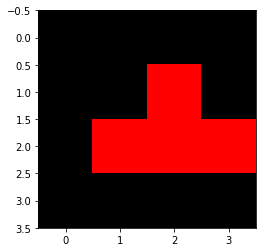

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# random data
x = i.reshape(4,4)


fig, ax = plt.subplots()

# define the colors
cmap = mpl.colors.ListedColormap(['r', 'k'])

# create a normalize object the describes the limits of
# each color
bounds = [0., 0.5, 1.]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# plot it
ax.imshow(x, interpolation='none', cmap=cmap, norm=norm)

In [47]:
qr=QuantumRegister(5)
cr = ClassicalRegister(1)
circuit=QuantumCircuit(qr, cr)
circuit.h(qr[0]);
circuit.h(qr[1]);
circuit.h(qr[2]);
circuit.h(qr[3]);

if i[0] == -1:
    i=-i
    
if i[1]==-1:
    circuit.z(qr[0])
    ii[3]=-ii[3]
    ii[5]=-ii[5]
    ii[7]=-ii[7]
    ii[9]=-ii[9]
    ii[11]=-ii[11]
    ii[13]=-ii[13]
    ii[15]=-ii[15]
    
if i[2]==-1:
    circuit.z(qr[1])
    ii[3]=-ii[3]
    ii[6]=-ii[6]
    ii[7]=-ii[7]
    ii[10]=-ii[10]
    ii[11]=-ii[11]
    ii[14]=-ii[14]
    ii[15]=-ii[15]
    
if i[4]==-1:
    circuit.z(qr[2])
    ii[5]=-ii[5]
    ii[6]=-ii[6]
    ii[7]=-ii[7]
    ii[12]=-ii[12]
    ii[13]=-ii[13]
    ii[14]=-ii[14]
    ii[15]=-ii[15]
    
if i[8]==-1:
    circuit.z(qr[3])
    ii[9]=-ii[9]
    ii[10]=-ii[10]
    ii[11]=-ii[11]
    ii[12]=-ii[12]
    ii[13]=-ii[13]
    ii[14]=-ii[14]
    ii[15]=-ii[15]
        
if ii[3] != i[3]:
    circuit.cz(qr[0],qr[1]);
    ii[7]=-ii[7]
    ii[11]=-ii[11]
    ii[15]=-ii[15]

if ii[5] != i[5]:
    circuit.cz(qr[0],qr[2]);
    ii[13]=-ii[13]
    ii[15]=-ii[15]
    ii[7]=-ii[7]

if ii[6] != i[6]:
    circuit.cz(qr[1],qr[2]);
    ii[7]=-ii[7]
    ii[14]=-ii[14]
    ii[15]=-ii[15]
if ii[9] != i[9]:
    circuit.cz(qr[0],qr[3]);
    ii[11]=-ii[11]
    ii[13]=-ii[13]
    ii[15]=-ii[15]
if ii[10] != i[10]:
    circuit.cz(qr[1],qr[3]);
    ii[11]=-ii[11]
    ii[14]=-ii[14]
    ii[15]=-ii[15]
if ii[12] != i[12]:
    circuit.cz(qr[2],qr[3]);
    ii[13]=-ii[13]
    ii[14]=-ii[14]
    ii[15]=-ii[15]

if ii[7] != i[7]:
    controls=[0,1]
    target=2
    circuit.mcrz(q_controls=[qr[0], qr[1]], q_target=qr[2], lam=np.pi)
    ii[15]=-ii[15]
if ii[11] != i[11]:
    controls=[0,1]
    target=3
    circuit.mcrz(q_controls=[qr[0], qr[1]], q_target=qr[3], lam=np.pi)
    ii[15]=-ii[15]
if ii[13] != i[13]:
    controls=[0,2]
    target=3
    circuit.mcrz(q_controls=[qr[0], qr[2]], q_target=qr[3], lam=np.pi)
    ii[15]=-ii[15]
if ii[14] != i[14]:
    controls=[1,2]
    target=3
    circuit.mcrz(q_controls=[qr[1], qr[2]], q_target=qr[3], lam=np.pi)
    ii[15]=-ii[15]
if ii[15] != i[15]:
    controls=[0,1,2]
    target=3
    circuit.mcrz(q_controls=[qr[0], qr[1],qr[2]], q_target=qr[3], lam=np.pi)

if w[0] == -1:
    w=-w

if w[1]==-1:
    circuit.z(qr[0])
    ww[3]=-ww[3]
    ww[5]=-ww[5]
    ww[7]=-ww[7]
    ww[9]=-ww[9]
    ww[11]=-ww[11]
    ww[13]=-ww[13]
    ww[15]=-ww[15]
    
if w[2]==-1:
    circuit.z(qr[1])
    ww[3]=-ww[3]
    ww[6]=-ww[6]
    ww[7]=-ww[7]
    ww[10]=-ww[10]
    ww[11]=-ww[11]
    ww[14]=-ww[14]
    ww[15]=-ww[15]
    
if w[4]==-1:
    circuit.z(qr[2])
    ww[5]=-ww[5]
    ww[6]=-ww[6]
    ww[7]=-ww[7]
    ww[12]=-ww[12]
    ww[13]=-ww[13]
    ww[14]=-ww[14]
    ww[15]=-ww[15]
    
if w[8]==-1:
    circuit.z(qr[3])
    ww[9]=-ww[9]
    ww[10]=-ww[10]
    ww[11]=-ww[11]
    ww[12]=-ww[12]
    ww[13]=-ww[13]
    ww[14]=-ww[14]
    ww[15]=-ww[15]
    
    
if ww[3] != w[3]:
    circuit.cz(qr[0],qr[1]);
    ww[7]=-ww[7]
    ww[11]=-ww[11]
    ww[15]=-ww[15]
if ww[5] != w[5]:
    circuit.cz(qr[0],qr[2])
    ww[7]=-ww[7]
    ww[13]=-ww[13]
    ww[15]=-ww[15]
if ww[6] != w[6]:
    circuit.cz(qr[1],qr[2]);
    ww[7]=-ww[7]
    ww[14]=-ww[14]
    ww[15]=-ww[15]
if ww[9] != w[9]:
    circuit.cz(qr[0],qr[3]);
    ww[11]=-ww[11]
    ww[13]=-ww[13]
    ww[15]=-ww[15]
if ww[10] != w[10]:
    circuit.cz(qr[1],qr[3]);
    ww[11]=-ww[11]
    ww[14]=-ww[14]
    ww[15]=-ww[15]
if ww[12] != w[12]:
    circuit.cz(qr[2],qr[3]);
    ww[13]=-ww[13]
    ww[14]=-ww[14]
    ww[15]=-ww[15]

if ww[7] != w[7]:
    controls=[0,1]
    target=2
    circuit.mcrz(q_controls=[qr[0], qr[1]], q_target=qr[2], lam=np.pi)
    ww[15]=-ww[15]
if ww[11] != w[11]:
    controls=[0,1]
    target=3
    circuit.mcrz(q_controls=[qr[0], qr[1]], q_target=qr[3], lam=np.pi)
    ww[15]=-ww[15]
if ww[13] != w[13]:
    controls=[0,2]
    target=3
    circuit.mcrz(q_controls=[qr[0], qr[2]], q_target=qr[3], lam=np.pi)
    ww[15]=-ww[15]
if ww[14] != w[14]:
    controls=[1,2]
    target=3
    circuit.mcrz(q_controls=[qr[1], qr[2]], q_target=qr[3], lam=np.pi)
    ww[15]=-ww[15]
if ww[15] != w[15]:
    controls=[0,1,2]
    target=3
    circuit.mcrz(q_controls=[qr[0], qr[1],qr[2]], q_target=qr[3], lam=np.pi)
    ww[15]=-ww[15] 
    
circuit.h(qr[0]);
circuit.h(qr[1]);
circuit.h(qr[2]);
circuit.h(qr[3]);

circuit.x(qr[0]);
circuit.x(qr[1]);
circuit.x(qr[2]);
circuit.x(qr[3]);

## Multicontrolled X-Gate
circuit.mcrx(q_controls=[qr[0], qr[1], qr[2], qr[3]], q_target=qr[4], theta=np.pi)
circuit.measure(qr[4], cr[0]);
#     
backend_sim = Aer.get_backend('qasm_simulator')
#backend_sim = Aer.get_backend('unitary_simulator')
job_sim = execute(circuit, backend_sim)
result_sim = job_sim.result()
result_counts = result_sim.get_counts(circuit)    
# Print the results
print(result_counts)
res_1=result_counts.get('1')
if res_1==None:
    res_1=0
    
res_0=result_counts.get('0')
if res_0==None:
    res_0=0
print(res_1/(res_0+res_1))
print(res_0/(res_0+res_1))


{'0': 772, '1': 252}
0.24609375
0.75390625


Compare with fig. 4 in the paper. 

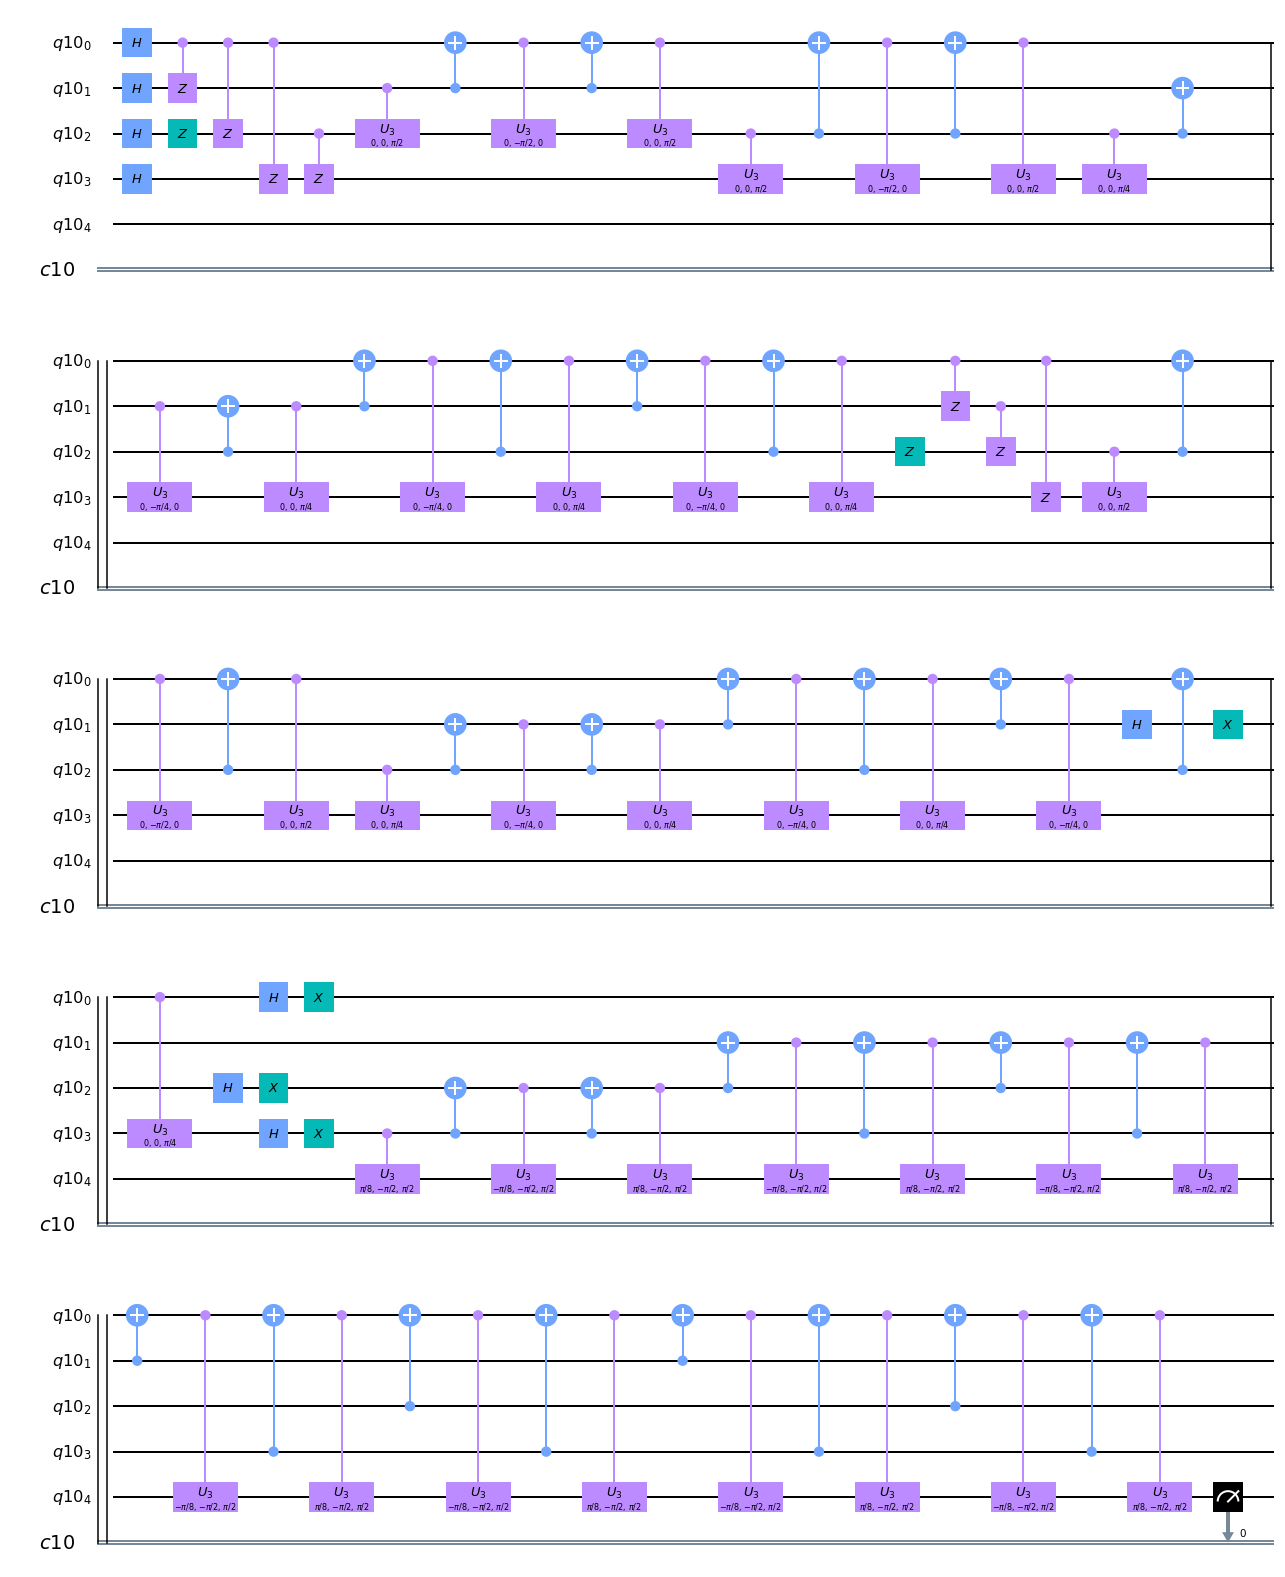

In [48]:
circuit.draw(output='mpl')

In the next part of the notebook a simple gradient descent is implemented, which can be used for pattern recognition.
Note: This is not included in the paper, but is a slight modification.

In [41]:
## This code reproduces the results of the above paper .... 
## + gradient descent 

n=np.zeros(16)
m=np.zeros(16)
dL=np.zeros(16)

i=np.ones(16)
w=np.ones(16)
ws=np.ones(16)

ii=np.ones(16)
ww=np.ones(16)

Input of the pattern, which has to be detected:

In [42]:
n[6]=1
n[3]=1
n[13]=1
n[4]=1
n[9]=1
i=(-i)**n
w=(-w)**m

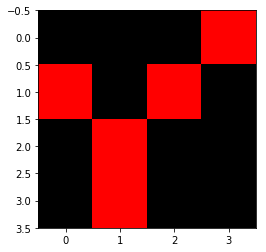

In [43]:
x = i.reshape(4,4)


fig, ax = plt.subplots()

# define the colors
cmap = mpl.colors.ListedColormap(['r', 'k'])

# create a normalize object the describes the limits of
# each color
bounds = [0., 0.5, 1.]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# plot it
ax.imshow(x, interpolation='none', cmap=cmap, norm=norm)

In [44]:

Loss_o=100
Loss=100

for k in range(0,20):
    Loss_o=Loss

    qr = QuantumRegister(5)
    cr = ClassicalRegister(1)
    circuit=QuantumCircuit(qr, cr)
    circuit.h(qr[0]);
    circuit.h(qr[1]);
    circuit.h(qr[2]);
    circuit.h(qr[3]);

    if i[0] == -1:
        i=-i
    
    if i[1]==-1:
        circuit.z(qr[0])
        ii[3]=-ii[3]
        ii[5]=-ii[5]
        ii[7]=-ii[7]
        ii[9]=-ii[9]
        ii[11]=-ii[11]
        ii[13]=-ii[13]
        ii[15]=-ii[15]

    if i[2]==-1:
        circuit.z(qr[1])
        ii[3]=-ii[3]
        ii[6]=-ii[6]
        ii[7]=-ii[7]
        ii[10]=-ii[10]
        ii[11]=-ii[11]
        ii[14]=-ii[14]
        ii[15]=-ii[15]

    if i[4]==-1:
        circuit.z(qr[2])
        ii[5]=-ii[5]
        ii[6]=-ii[6]
        ii[7]=-ii[7]
        ii[12]=-ii[12]
        ii[13]=-ii[13]
        ii[14]=-ii[14]
        ii[15]=-ii[15]

    if i[8]==-1:
        circuit.z(qr[3])
        ii[9]=-ii[9]
        ii[10]=-ii[10]
        ii[11]=-ii[11]
        ii[12]=-ii[12]
        ii[13]=-ii[13]
        ii[14]=-ii[14]
        ii[15]=-ii[15]

    if ii[3] != i[3]:
        circuit.cz(qr[0],qr[1]);
        ii[7]=-ii[7]
        ii[11]=-ii[11]
        ii[15]=-ii[15]

    if ii[5] != i[5]:
        circuit.cz(qr[0],qr[2]);
        ii[13]=-ii[13]
        ii[15]=-ii[15]
        ii[7]=-ii[7]

    if ii[6] != i[6]:
        circuit.cz(qr[1],qr[2]);
        ii[7]=-ii[7]
        ii[14]=-ii[14]
        ii[15]=-ii[15]
    if ii[9] != i[9]:
        circuit.cz(qr[0],qr[3]);
        ii[11]=-ii[11]
        ii[13]=-ii[13]
        ii[15]=-ii[15]
    if ii[10] != i[10]:
        circuit.cz(qr[1],qr[3]);
        ii[11]=-ii[11]
        ii[14]=-ii[14]
        ii[15]=-ii[15]
    if ii[12] != i[12]:
        circuit.cz(qr[2],qr[3]);
        ii[13]=-ii[13]
        ii[14]=-ii[14]
        ii[15]=-ii[15]

    if ii[7] != i[7]:
        controls=[0,1]
        target=2
        circuit.mcrz(q_controls=[qr[0], qr[1]], q_target=qr[2], lam=np.pi)
        ii[15]=-ii[15]
    if ii[11] != i[11]:
        controls=[0,1]
        target=3
        circuit.mcrz(q_controls=[qr[0], qr[1]], q_target=qr[3], lam=np.pi)
        ii[15]=-ii[15]
    if ii[13] != i[13]:
        controls=[0,2]
        target=3
        circuit.mcrz(q_controls=[qr[0], qr[2]], q_target=qr[3], lam=np.pi)
        ii[15]=-ii[15]
    if ii[14] != i[14]:
        controls=[1,2]
        target=3
        circuit.mcrz(q_controls=[qr[1], qr[2]], q_target=qr[3], lam=np.pi)
        ii[15]=-ii[15]
    if ii[15] != i[15]:
        controls=[0,1,2]
        target=3
        circuit.mcrz(q_controls=[qr[0], qr[1],qr[2]], q_target=qr[3], lam=np.pi)

    if w[0] == -1:
        w=-w

    if w[1]==-1:
        circuit.z(qr[0])
        ww[3]=-ww[3]
        ww[5]=-ww[5]
        ww[7]=-ww[7]
        ww[9]=-ww[9]
        ww[11]=-ww[11]
        ww[13]=-ww[13]
        ww[15]=-ww[15]

    if w[2]==-1:
        circuit.z(qr[1])
        ww[3]=-ww[3]
        ww[6]=-ww[6]
        ww[7]=-ww[7]
        ww[10]=-ww[10]
        ww[11]=-ww[11]
        ww[14]=-ww[14]
        ww[15]=-ww[15]

    if w[4]==-1:
        circuit.z(qr[2])
        ww[5]=-ww[5]
        ww[6]=-ww[6]
        ww[7]=-ww[7]
        ww[12]=-ww[12]
        ww[13]=-ww[13]
        ww[14]=-ww[14]
        ww[15]=-ww[15]

    if w[8]==-1:
        circuit.z(qr[3])
        ww[9]=-ww[9]
        ww[10]=-ww[10]
        ww[11]=-ww[11]
        ww[12]=-ww[12]
        ww[13]=-ww[13]
        ww[14]=-ww[14]
        ww[15]=-ww[15]


    if ww[3] != w[3]:
        circuit.cz(qr[0],qr[1]);
        ww[7]=-ww[7]
        ww[11]=-ww[11]
        ww[15]=-ww[15]
    if ww[5] != w[5]:
        circuit.cz(qr[0],qr[2])
        ww[7]=-ww[7]
        ww[13]=-ww[13]
        ww[15]=-ww[15]
    if ww[6] != w[6]:
        circuit.cz(qr[1],qr[2]);
        ww[7]=-ww[7]
        ww[14]=-ww[14]
        ww[15]=-ww[15]
    if ww[9] != w[9]:
        circuit.cz(qr[0],qr[3]);
        ww[11]=-ww[11]
        ww[13]=-ww[13]
        ww[15]=-ww[15]
    if ww[10] != w[10]:
        circuit.cz(qr[1],qr[3]);
        ww[11]=-ww[11]
        ww[14]=-ww[14]
        ww[15]=-ww[15]
    if ww[12] != w[12]:
        circuit.cz(qr[2],qr[3]);
        ww[13]=-ww[13]
        ww[14]=-ww[14]
        ww[15]=-ww[15]

    if ww[7] != w[7]:
        controls=[0,1]
        target=2
        circuit.mcrz(q_controls=[qr[0], qr[1]], q_target=qr[2], lam=np.pi)
        ww[15]=-ww[15]
    if ww[11] != w[11]:
        controls=[0,1]
        target=3
        circuit.mcrz(q_controls=[qr[0], qr[1]], q_target=qr[3], lam=np.pi)
        ww[15]=-ww[15]
    if ww[13] != w[13]:
        controls=[0,2]
        target=3
        circuit.mcrz(q_controls=[qr[0], qr[2]], q_target=qr[3], lam=np.pi)
        ww[15]=-ww[15]
    if ww[14] != w[14]:
        controls=[1,2]
        target=3
        circuit.mcrz(q_controls=[qr[1], qr[2]], q_target=qr[3], lam=np.pi)
        ww[15]=-ww[15]
    if ww[15] != w[15]:
        controls=[0,1,2]
        target=3
        circuit.mcrz(q_controls=[qr[0], qr[1],qr[2]], q_target=qr[3], lam=np.pi)
        ww[15]=-ww[15] 

    circuit.h(qr[0]);
    circuit.h(qr[1]);
    circuit.h(qr[2]);
    circuit.h(qr[3]);

    circuit.x(qr[0]);
    circuit.x(qr[1]);
    circuit.x(qr[2]);
    circuit.x(qr[3]);

    ## Multicontrolled X-Gate
    circuit.mcrx(q_controls=[qr[0], qr[1], qr[2], qr[3]], q_target=qr[4], theta=np.pi)
    circuit.measure(qr[4], cr[0]);

    #                                execute_locally(circuit,draw_circuit=False)
    backend_sim = Aer.get_backend('qasm_simulator')
#    backend_sim = Aer.get_backend('unitary_simulator')
    job_sim = execute(circuit, backend_sim)
    result_sim = job_sim.result()
    result_counts = result_sim.get_counts(circuit)    
    # Print the results
    print(result_counts)
    res_1=result_counts.get('1')
    if res_1==None:
        res_1=0
    res_0=result_counts.get('0')
    if res_0==None:
        res_0=0
    res_1=res_1/(res_0+res_1)    
    res_0=res_0/(res_0+res_1) 
#
    Loss=(1.0-res_1)**2
    print('Temp Loss:',Loss)
#    print('w_0:',w_0)
#    print('w_1:',w_1)
#    print('w_2:',w_2)
#    print('w_3:',w_3)
    if Loss > Loss_o and k>5:
    #if Loss > Loss_o:
        for g in range(0,16):
            w[g]=ws[g]      
        break
    else:
        for g in range(0,16):
            dL[g]=-2*i[g]*(1-res_1)
            ws[g]=w[g]
            w[g]=w[g]-dL[g]
            if w[g] >= 0:
                w[g] = 1;
            if w[g] < 0:
                w[g] = -1;
#        
#
print('Final Loss:',Loss_o)
#
print()
for g in range(0,16):
    print('i',g,':',i[g])
for g in range(0,16):
    print('w',g,':',w[g])
for g in range(0,16):
    print('delta:',i[g]-w[g])
    




{'0': 875, '1': 149}
Temp Loss: 0.7301568984985352
{'0': 886, '1': 138}
Temp Loss: 0.7486305236816406
{'0': 774, '1': 250}
Temp Loss: 0.5713233947753906
{'0': 877, '1': 147}
Temp Loss: 0.7334985733032227
{'0': 766, '1': 258}
Temp Loss: 0.5595741271972656
{'0': 885, '1': 139}
Temp Loss: 0.7469415664672852
{'0': 760, '1': 264}
Temp Loss: 0.55084228515625
{'0': 870, '1': 154}
Temp Loss: 0.7218360900878906
Final Loss: 0.55084228515625

i 0 : 1.0
i 1 : 1.0
i 2 : 1.0
i 3 : -1.0
i 4 : -1.0
i 5 : 1.0
i 6 : -1.0
i 7 : 1.0
i 8 : 1.0
i 9 : -1.0
i 10 : 1.0
i 11 : 1.0
i 12 : 1.0
i 13 : -1.0
i 14 : 1.0
i 15 : 1.0
w 0 : 1.0
w 1 : 1.0
w 2 : 1.0
w 3 : -1.0
w 4 : -1.0
w 5 : 1.0
w 6 : -1.0
w 7 : 1.0
w 8 : 1.0
w 9 : -1.0
w 10 : 1.0
w 11 : 1.0
w 12 : 1.0
w 13 : -1.0
w 14 : 1.0
w 15 : 1.0
delta: 0.0
delta: 0.0
delta: 0.0
delta: 0.0
delta: 0.0
delta: 0.0
delta: 0.0
delta: 0.0
delta: 0.0
delta: 0.0
delta: 0.0
delta: 0.0
delta: 0.0
delta: 0.0
delta: 0.0
delta: 0.0


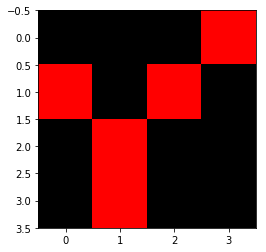

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# random data
x = i.reshape(4,4)


fig, ax = plt.subplots()

# define the colors
cmap = mpl.colors.ListedColormap(['r', 'k'])

# create a normalize object the describes the limits of
# each color
bounds = [0., 0.5, 1.]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# plot it
ax.imshow(x, interpolation='none', cmap=cmap, norm=norm)

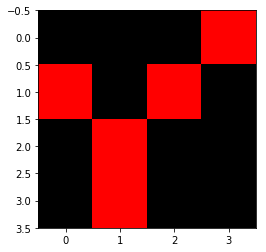

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# random data
y=  w.reshape(4,4)

fig, ax = plt.subplots()

# define the colors
cmap = mpl.colors.ListedColormap(['r', 'k'])

# create a normalize object the describes the limits of
# each color
bounds = [0., 0.5, 1.]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# plot it
ax.imshow(y, interpolation='none', cmap=cmap, norm=norm)

Note: If the pictures coincides, the pattern was detected by the algorithms !! 